# 6-7. 프로젝트: 멋진 작사가 만들기

## 👣Step 1. 라이브러리 호출

In [1]:
import glob
import os
import numpy as np         
import tensorflow as tf   
import re 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 👣Step 2. 데이터 읽어오기

In [2]:
txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'

In [3]:
txt_list = glob.glob(txt_file_path)

In [4]:
(txt_list)

['/aiffel/aiffel/lyricist/data/lyrics/janisjoplin.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/nursery_rhymes.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dickinson.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/nicki-minaj.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/disney.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bob-marley.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/beatles.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dj-khaled.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/kanye.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/patti-smith.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/drake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/r-kelly.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/rihanna.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/cake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bruno-mars.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/leonard-cohen.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/ludacris.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/kanye-west.txt',
 '/aiffel/aiffel/lyricist/data/ly

자료를 쭉 보니 이상한 것들이 있습니다.  
Lil_Wayne이라는 래퍼의 노래는 2개로 중복이 되어 있고 Kanye_West 또한 3개가 있습니다.  
그리고 notorious-big 이라는 가수 또한 같은 데이터가 2개나 있군요!  
직접 들어가 데이터를 살펴보니 중복되어 있는 파일이니 중복 되는 것들은 빼고 불러와야 할 것 같습니다.  

그리고.. r-kelly라는 가수는 R&B에서 큰 업적을 이루었지만.. 소아성범죄자 이기 때문에 데이터에서 빼도록 하겠습니다.  
소아성범죄자는 근절되어야 합니다.

## 👣Step 3. 데이터 정제

### ❗❗❗❗❗잠깐 3분만 투자하세요❗❗❗❗❗ 
### 춘식이의 실험실 🧪

In [5]:
raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list: 
    if 'r-kelly' in txt_file: 
        print(f"{txt_file}(성범죄자)가 삭제되었습니다.")
        continue
    if 'lil-wayne' in txt_file: 
        print(f"{txt_file}(중복 데이터)가 삭제되었습니다.")
        continue
    if 'notorious-big' in txt_file: 
        print(f"{txt_file}(중복 데이터)가 삭제되었습니다.")
        continue
    if 'kanye' in txt_file: 
        print(f"{txt_file}(중복 데이터)가 삭제되었습니다.")
        continue
    
    
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

/aiffel/aiffel/lyricist/data/lyrics/kanye.txt(중복 데이터)가 삭제되었습니다.
/aiffel/aiffel/lyricist/data/lyrics/r-kelly.txt(성범죄자)가 삭제되었습니다.
/aiffel/aiffel/lyricist/data/lyrics/kanye-west.txt(중복 데이터)가 삭제되었습니다.
/aiffel/aiffel/lyricist/data/lyrics/notorious-big.txt(중복 데이터)가 삭제되었습니다.
/aiffel/aiffel/lyricist/data/lyrics/lil-wayne.txt(중복 데이터)가 삭제되었습니다.
데이터 크기: 164536
Examples:
 ["Busted flat in Baton Rouge, waitin' for a train", "And I's feelin' near as faded as my jeans", 'Bobby thumbed a diesel down, just before it rained']


보시는 바와 같이 중복되어있던 kanye-west 파일 2개 와 notorious-big 1개, lil-wayne 데이터 1개가 삭제 되었습니다.  
그리고 성범죄자 r-kelly 또한 삭제되었어요  
이제야 좀 데이터가 마음에 듭니다!

In [6]:
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   # 길이가 0인 문장은 건너뜁니다.
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜁니다.

    if idx > 9: break   # 일단 문장 10개만 확인해 볼 겁니다.
        
    print(sentence)

Busted flat in Baton Rouge, waitin' for a train
And I's feelin' near as faded as my jeans
Bobby thumbed a diesel down, just before it rained
It rode us all the way to New Orleans I pulled my harpoon out of my dirty red bandanna
I was playin' soft while Bobby sang the blues, yeah
Windshield wipers slappin' time, I was holdin' Bobby's hand in mine
We sang every song that driver knew Freedom's just another word for nothin' left to lose
Nothin', don't mean nothin' hon' if it ain't free, no no
And, feelin' good was easy, Lord, when he sang the blues
You know, feelin' good was good enough for me


In [7]:
def preprocess_sentence(sentence):
    #일단 모두 소문자로 변환하고 양쪽 공백을 지웁니다.
    sentence = sentence.lower().strip()   
    # 아래 특수문자 기호 양쪽에 공백을 추가합니다.
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) 
     # 공백이 많을 수 있는 부분에는 하나의 공백으로 통일합니다.
    sentence = re.sub(r'[" "]+', " ", sentence) 
     # ""안에 들어가있는 기호들 외에 공백으로 바꿉니다.
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) 
    #다시 양쪽 공백을 지웁니다.
    sentence = sentence.strip()
    # 문장 시작과 끝에 start와 end 를 추가합니다.
    sentence = '<start> ' + sentence + ' <end>'      
    
    return sentence

In [8]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
        
    corpus.append(preprocess_sentence(sentence))
        
corpus[:10]

['<start> busted flat in baton rouge , waitin for a train <end>',
 '<start> and i s feelin near as faded as my jeans <end>',
 '<start> bobby thumbed a diesel down , just before it rained <end>',
 '<start> it rode us all the way to new orleans i pulled my harpoon out of my dirty red bandanna <end>',
 '<start> i was playin soft while bobby sang the blues , yeah <end>',
 '<start> windshield wipers slappin time , i was holdin bobby s hand in mine <end>',
 '<start> we sang every song that driver knew freedom s just another word for nothin left to lose <end>',
 '<start> nothin , don t mean nothin hon if it ain t free , no no <end>',
 '<start> and , feelin good was easy , lord , when he sang the blues <end>',
 '<start> you know , feelin good was good enough for me <end>']

## 👣STEP. 4 데이터 토큰화

In [9]:
def tokenize(corpus):
    # 텐서플로우에서 제공하는 Tokenizer 패키지를 생성
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=17000,  # 전체 단어의 개수 
        filters=' ',    # 별도로 전처리 로직을 추가할 수 있습니다. 이번에는 사용하지 않겠습니다.
        oov_token="<unk>"  # out-of-vocabulary, 사전에 없었던 단어는 어떤 토큰으로 대체할지
    )
    tokenizer.fit_on_texts(corpus)   # 우리가 구축한 corpus로부터 Tokenizer가 사전을 자동구축하게 됩니다.

    # 이후 tokenizer를 활용하여 모델에 입력할 데이터셋을 구축하게 됩니다.
    tensor = tokenizer.texts_to_sequences(corpus)   # tokenizer는 구축한 사전으로부터 corpus를 해석해 Tensor로 변환합니다.
	
    total_data_text = list(tensor)
    num_tokens = [len(tokens) for tokens in total_data_text]
    max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
    maxlen = int(max_tokens)
    # 입력 데이터의 시퀀스 길이를 일정하게 맞추기 위한 padding  메소드를 제공합니다.
    # maxlen의 디폴트값은 None입니다. 이 경우 corpus의 가장 긴 문장을 기준으로 시퀀스 길이가 맞춰집니다.
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, 
                                                           padding='post',
                                                          maxlen=maxlen)  

    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2 3608 1655 ...    0    0    0]
 [   2    8    5 ...    0    0    0]
 [   2  759 6875 ...    0    0    0]
 ...
 [   2    5   20 ...    0    0    0]
 [   2    5   20 ...    0    0    0]
 [   2    5   20 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f2fd25c8070>


In [10]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [11]:
src_input = tensor[:, :-1]  # tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다. 마지막 토큰은 <END>가 아니라 <pad>일 가능성이 높습니다.
tgt_input = tensor[:, 1:]    # tensor에서 <START>를 잘라내서 타겟 문장을 생성합니다.

print(src_input[0])
print(tgt_input[0])

[   2 3608 1655   15 6337 3896    4 1037   28    9  640    3    0    0
    0    0    0    0    0]
[3608 1655   15 6337 3896    4 1037   28    9  640    3    0    0    0
    0    0    0    0    0]


## 👣Step 5. 평가 데이터셋 분리

In [12]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer의 단어 17000개, 0:<pad>를 포함하여 17001개입니다.
VOCAB_SIZE = tokenizer.num_words + 1   

# Train, val data 분리
X_train, X_fox, y_train, y_fox = train_test_split(src_input, tgt_input, test_size=0.2, random_state=49)


# 준비한 데이터 소스로부터 데이터셋을 만듭니다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)

fox_dataset = tf.data.Dataset.from_tensor_slices((X_fox, y_fox))
fox_dataset = fox_dataset.shuffle(BUFFER_SIZE)
fox_dataset = fox_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [13]:
print(X_train.shape)
print(y_train.shape)

(122568, 19)
(122568, 19)


In [14]:
print(X_fox.shape)
print(y_fox.shape)

(30643, 19)
(30643, 19)


In [15]:
train_dataset

<BatchDataset shapes: ((256, 19), (256, 19)), types: (tf.int32, tf.int32)>

In [16]:
fox_dataset

<BatchDataset shapes: ((256, 19), (256, 19)), types: (tf.int32, tf.int32)>

In [17]:
def plot_curve(epochs, hist, list_of_metrics):
    
    fig, ax = plt.subplots(1,2,figsize = (12, 8))
    
    for i in range(len(ax)):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Value')
        
        for n in range(len(list_of_metrics)):
            if i == 0:
                y = hist[list_of_metrics[n]]
                if n == 0:
                    ax[i].plot(epochs, y, label="train")
                else:
                    ax[i].plot(epochs, y, label="val")
                ax[i].set_title('Loss')
                ax[i].legend(loc='upper right')
                if n == 1:
                    break
            else:
                if n >= 2:
                    y = hist[list_of_metrics[n]]
                    if n == 2:
                        ax[i].plot(epochs, y, label="train")
                    else:
                        ax[i].plot(epochs, y, label="val")
                    ax[i].set_title('Accuracy')
                    ax[i].legend(loc='lower right')
                    
    plt.show()

In [18]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(TextGenerator, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.drop1 = tf.keras.layers.Dropout(0.3)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.drop1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 1024
hidden_size = 2048
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [19]:
for src_sample, tgt_sample in train_dataset.take(1): break
model(src_sample)

<tf.Tensor: shape=(256, 19, 17001), dtype=float32, numpy=
array([[[-1.40879929e-04, -5.18796587e-05,  3.45731241e-04, ...,
          1.42016666e-04,  8.98681101e-05, -1.62823635e-04],
        [-3.22671724e-04, -1.29908032e-04,  4.51113097e-04, ...,
         -2.32025966e-04,  3.90218833e-04,  2.27962577e-04],
        [-2.24309930e-04, -3.34710348e-04,  5.81824628e-04, ...,
         -6.16510166e-04,  2.79582280e-04,  1.60098454e-04],
        ...,
        [-1.62777503e-03, -2.41252448e-04,  1.45926303e-03, ...,
          1.31748698e-03, -1.09348388e-03, -3.65626952e-03],
        [-1.87793677e-03, -3.00174230e-04,  1.66508718e-03, ...,
          1.68709958e-03, -1.24047836e-03, -3.61979008e-03],
        [-2.11701123e-03, -3.38467391e-04,  1.84564653e-03, ...,
          2.02356186e-03, -1.39233680e-03, -3.54811130e-03]],

       [[-1.40879929e-04, -5.18796587e-05,  3.45731241e-04, ...,
          1.42016666e-04,  8.98681101e-05, -1.62823635e-04],
        [ 1.15680676e-04,  1.66361671e-04,  2

In [20]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  17409024  
_________________________________________________________________
lstm (LSTM)                  multiple                  25174016  
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
lstm_1 (LSTM)                multiple                  33562624  
_________________________________________________________________
dense (Dense)                multiple                  34835049  
Total params: 110,980,713
Trainable params: 110,980,713
Non-trainable params: 0
_________________________________________________________________


In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

## 👣Step 6. 인공지능 만들기

In [22]:
history = model.fit(train_dataset,
            epochs=10,
            batch_size=256,
            validation_data=fox_dataset,
            verbose=1)

Epoch 1/10
478/478 [==============================] - 404s 836ms/step - loss: 2.8767 - accuracy: 0.5735 - val_loss: 2.5335 - val_accuracy: 0.6011
Epoch 2/10
478/478 [==============================] - 409s 856ms/step - loss: 2.3770 - accuracy: 0.6111 - val_loss: 2.3086 - val_accuracy: 0.6195
Epoch 3/10
478/478 [==============================] - 410s 858ms/step - loss: 2.1479 - accuracy: 0.6289 - val_loss: 2.1791 - val_accuracy: 0.6349
Epoch 4/10
478/478 [==============================] - 411s 859ms/step - loss: 1.9528 - accuracy: 0.6478 - val_loss: 2.0947 - val_accuracy: 0.6481
Epoch 5/10
478/478 [==============================] - 411s 859ms/step - loss: 1.7728 - accuracy: 0.6681 - val_loss: 2.0341 - val_accuracy: 0.6614
Epoch 6/10
478/478 [==============================] - 411s 859ms/step - loss: 1.6060 - accuracy: 0.6904 - val_loss: 1.9953 - val_accuracy: 0.6715
Epoch 7/10
478/478 [==============================] - 411s 859ms/step - loss: 1.4521 - accuracy: 0.7137 - val_loss: 1.9741 -

<Figure size 1080x576 with 0 Axes>

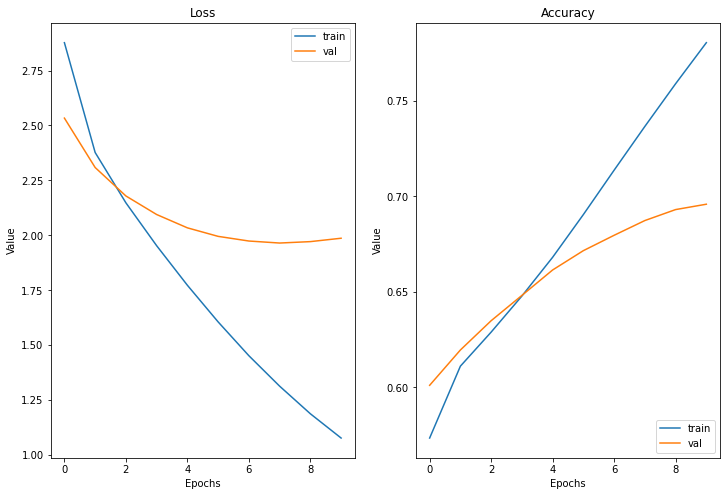

In [23]:
plt.figure(figsize=(15,8))

plot_curve(history.epoch, history.history, ['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [24]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해 입력받은 init_sentence도 텐서로 변환합니다.
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 루프를 돌면서 단어를 하나씩 생성 합니다. 
    while True:
        predict = model(test_tensor)  # 텐서를 입력합니다. 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]   # 우리 모델이 예측한 마지막 단어가 바로 새롭게 생성한 단어가 됩니다. 

        # 모델이 새롭게 예측한 단어를 입력 문장의 뒤에 붙입니다. 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        # 모델이 <END>를 예측하지 않았거나, max_len에 도달하지 않았다면  while 루프를 또 돌면서 다음 단어를 예측합니다.
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # 생성된 tensor 안에 있는 word index를 tokenizer.index_word 사전을 통해 실제 단어로 하나씩 변환합니다. 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated   # 이것이 최종적으로 모델이 생성한 자연어 문장입니다.

In [34]:
print(generate_text(model, tokenizer, init_sentence="<start> I love", max_len=20))
print(generate_text(model, tokenizer, init_sentence="<start> I miss", max_len=20))
print(generate_text(model, tokenizer, init_sentence="<start> You make me", max_len=20))
print(generate_text(model, tokenizer, init_sentence="<start> I wanna", max_len=20))

<start> i love you , i m not gonna crack <end> 
<start> i miss you so , so , i do <end> 
<start> you make me complete <end> 
<start> i wanna be with you , i wanna be with you <end> 


## 🚩STEP.7 회고

__1. 데이터 정리__  
우선 제일 처음부터 애를 먹었다.  
데이터들을 나열했을 때 중복되는 가수들이 보였고 또 성범죄자가 포함되어 있어서 그냥 진행을 해도 됐겠지만 성범죄자 그것도 아동 성범죄자를 데이터에 넣을 수는 없었다.  
또한 대부분의 사람은 몰랐겠지만 가수들의 목록 중 'Nursery rhyme'는 동요라서 더욱 빼고 싶었다.  
그런데 여기서 고민이 있었다. 그건 바로 데이터를 어떻게 정리할 것인가였다.  
사실 가장 간단한 방법으로는 클라우드에서 데이터를 삭제하는 방법도 이겠지만 익스에서 IF 문으로 구현해 보고 싶었고 이를 통해서 내 코딩 실력과 지식을 높여보고 싶었다.  
그래서 IF 문을 넣었을 때 처음에는 가수 이름을 지정하여 넣었지만 실행이 되지 않았다.  
그 이유는 간단했는데 제일 처음 IF 문 뒤에 텍스트 파일을 지정했는데 텍스트 파일의 경우는 경로를 지칭하는 부분이기 때문에 가수 이름이 아닌 똑같이 경로를 설정해 주어야 했다.  
결과는 성공했고 데이터가 잘 정리되었다.  
  
  
__2. 러닝 레이트__  
되게 어이없는 실수였다.  
난 당연하게도 이전 노드에서 러닝 레이트 값을 늘 0.5부터 시작했는데 여기서 0.5를 넣어주니 로스 값이 136으로 확 튀었다.  
그래서 처음에는 무엇이 잘못되었는지 몰라서 배치 사이즈부터 랜덤 스테이트까지 모두 건드려 봤지만 계속 해서 로스 값이 똑같았고 러닝 레이트를 한번 건드려 봤을 때 값이 확 떨어진 것을 보고 러닝 레이트가 문제였다고 생각하여 수정하니 좋은 결과가 나왔다.
   
     
     
__3. 진행하고 느낀 점__  
자부심 가질 수 있을 것 같습니다.  
저는 그 누구도 성범죄자를 빼지 않았을 것이라고 생각합니다.  
하지만 데이터를 일일이 찾아보고 검수하며 올바른 데이터로 좋은 결과를 나타내는 것 또한 중요한 일이라서 시도해 보았고 다행히도 성공적으로 마무리되어서 기쁜 마음으로 마무리할 수 있을 것 같습니다.  
춘식이의 실험실은 오늘 좋은 일을 했습니다..! 
제 노드 봐주셔서 감사합니다!